<a href="https://colab.research.google.com/github/lucasfreire01/Recognition_iamges_labels/blob/main/Image_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
#load the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import zipfile

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#load datasets
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
#take the validation values in the normalize train datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train

array([[[[ 34,  36,  43],
         [ 37,  37,  51],
         [ 44,  44,  64],
         ...,
         [ 62,  73,  93],
         [ 52,  63,  83],
         [ 45,  57,  77]],

        [[ 35,  35,  37],
         [ 34,  34,  40],
         [ 34,  33,  43],
         ...,
         [ 58,  69,  89],
         [ 50,  60,  80],
         [ 47,  58,  78]],

        [[ 34,  33,  35],
         [ 33,  32,  36],
         [ 33,  32,  38],
         ...,
         [ 66,  77,  97],
         [ 51,  62,  82],
         [ 53,  64,  84]],

        ...,

        [[ 32,  32,  38],
         [ 32,  31,  37],
         [ 33,  33,  38],
         ...,
         [ 41,  38,  45],
         [ 34,  31,  38],
         [ 36,  32,  40]],

        [[ 33,  31,  36],
         [ 32,  30,  36],
         [ 34,  32,  37],
         ...,
         [ 37,  35,  40],
         [ 32,  29,  35],
         [ 30,  28,  33]],

        [[ 37,  32,  35],
         [ 37,  32,  36],
         [ 37,  33,  36],
         ...,
         [ 49,  47,  49],
        

In [ ]:
x_train.shape

(40000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(40000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

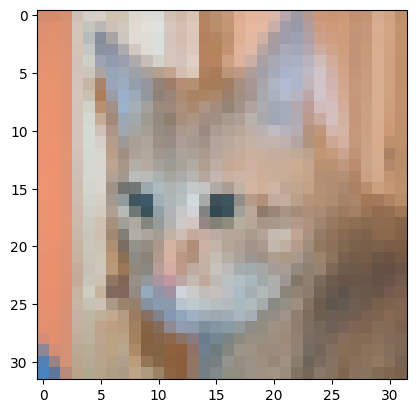

In [ ]:
#plot a random image
i = np.random.randint(0, 1000)
plt.figure()
plt.imshow(x_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


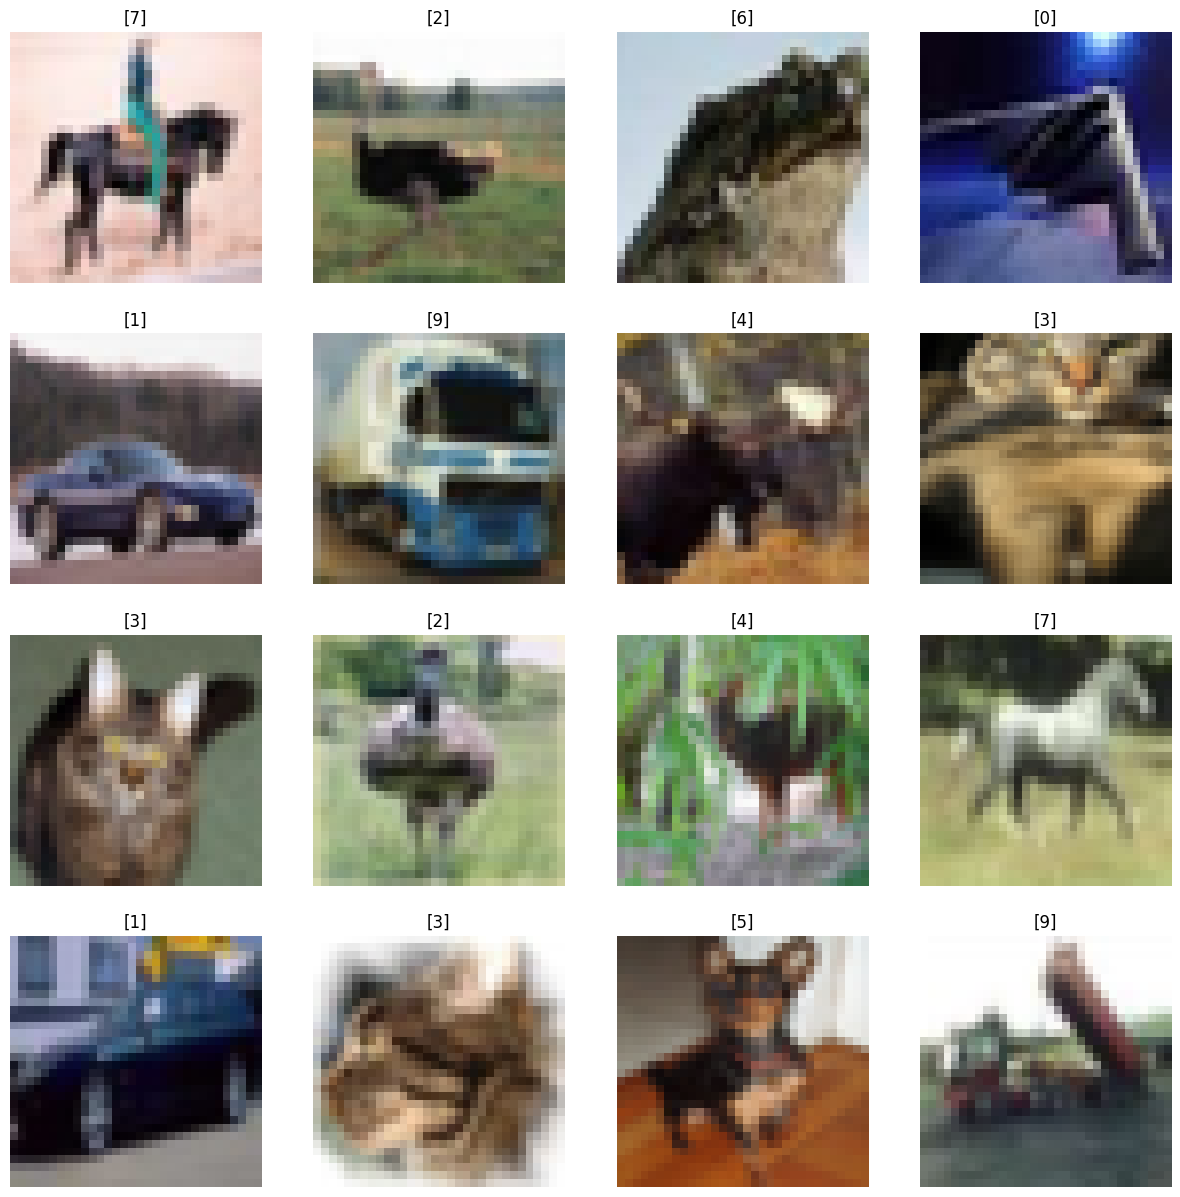

In [ ]:
#See the picture and yours lables
w = 4
l = 4
fig, axes = plt.subplots(l,w, figsize=(15,15))
axes = axes.ravel()

n_train = len(x_train)
for i in np.arange(0, l* w):
    index = np.random.randint(0, n_train)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')


# **Pre_Pocessing**

In [ ]:
#Transform in float32 to become these datas more computationally cheap
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
#See the label values
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"y_train label {value}: have {count} times")

y_train label 0: have 4027 times
y_train label 1: have 4021 times
y_train label 2: have 3970 times
y_train label 3: have 3977 times
y_train label 4: have 4067 times
y_train label 5: have 3985 times
y_train label 6: have 4004 times
y_train label 7: have 4006 times
y_train label 8: have 3983 times
y_train label 9: have 3960 times


In [ ]:
#Create a def to encoding the y datasets
def encoding(x, cat):
  x = tf.keras.utils.to_categorical(x, cat)
  return x

y_train = encoding(y_train, 10)
y_test = encoding(y_test, 10)
y_val = encoding(y_val, 10)

In [ ]:
#Normalizate the train database
def normalization(var):
  var_norm = var / 255.0
  return var_norm

In [ ]:
x_train_norm = normalization(x_train)
x_test_norm = normalization(x_test)
x_val_norm = normalization(x_val)

In [ ]:
#Transform in grayscale
def grayscale(x):
  x= np.sum(x / 3, axis=3, keepdims=True)
  return x

x_train_norm_gray = grayscale(x_train_norm)
x_test_norm_gray = grayscale(x_test_norm)
x_val_norm_gray = grayscale(x_val_norm)

In [ ]:
y_train.shape

(40000, 10)

In [ ]:
x_train_norm_gray.shape

(40000, 32, 32, 1)

In [ ]:
x_train_norm.shape

(40000, 32, 32, 3)

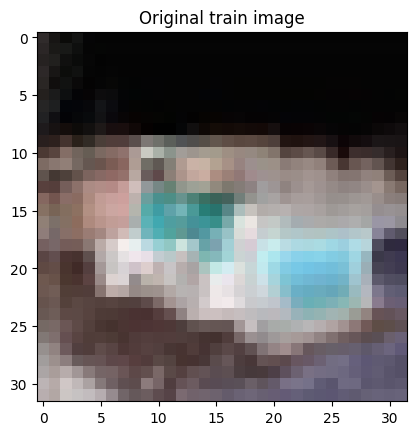

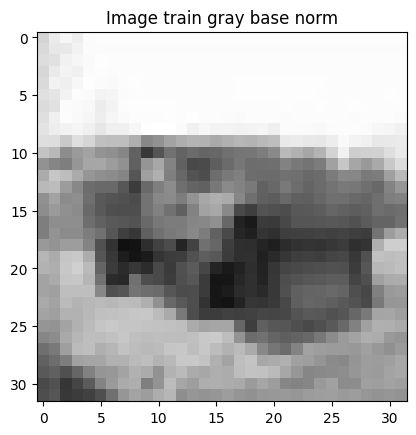

In [ ]:
i = np.random.randint(0, 40000)

# Visualize the original image
plt.figure()
plt.title("Original train image")
plt.imshow((x_train[i] * 255).astype(np.uint8))
# Visualize the normalized grayscale version
plt.figure()
plt.title("Image train gray base norm")
plt.imshow(x_train_norm_gray[i].squeeze(), cmap='gray', vmin=0, vmax=1)



In [ ]:
x_train_norm.shape

(40000, 32, 32, 3)

Text(0.5, 1.0, 'Norm Norse Image')

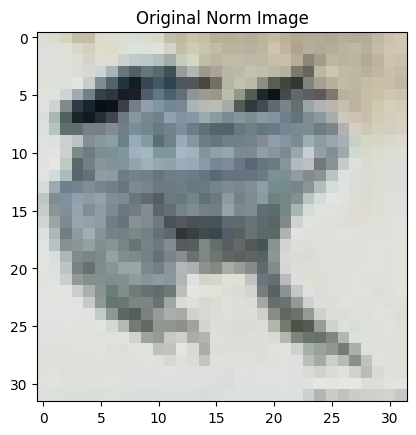

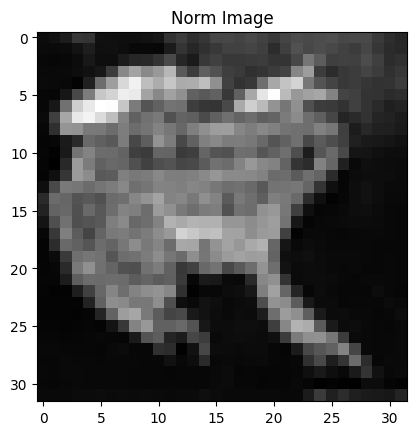

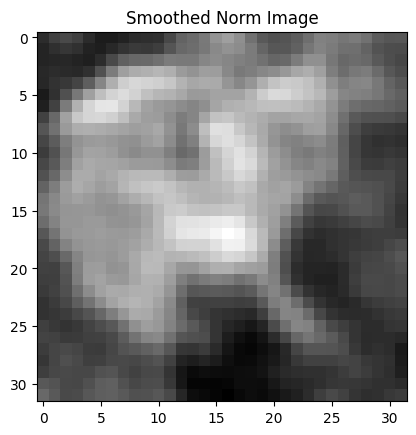

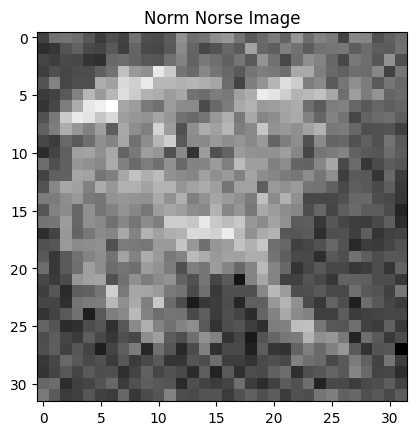

In [ ]:
#Noise random
from scipy.ndimage import gaussian_filter

#Create a def to noise random
def random_noise(x):
  return x + 0.1 * np.random.normal(size=x.shape)

x_train_norm_gray_noise = random_noise(x_train_norm_gray)
x_val_norm_gray_noise = random_noise(x_val_norm_gray)


#Create a def to gaussian_filter
def gaussian_filter_smoothad(x, simga):
  x = gaussian_filter(x, sigma=sigma)
  return x

x_train_norm_gray_noise_smoothed = gaussian_filter_smoothad(x_train_norm_gray_noise, 1)
x_val_norm_gray_noise_smoothed = gaussian_filter_smoothad(x_val_norm_gray_noise, 1)

# Plot the original, norm, smoothed and noise images for comparison
plt.figure()
plt.imshow((x_train[0] * 255).astype(np.uint8))
plt.title('Original Norm Image')

plt.figure()
plt.imshow(x_train_norm_gray[0], cmap='gray')
plt.title('Norm Image')

plt.figure()
plt.imshow(x_train_norm_gray_noise_smoothed[0], cmap='gray')
plt.title('Smoothed Norm Image')

plt.figure()
plt.imshow(x_train_norm_gray_noise[0], cmap='gray')
plt.title('Norm Norse Image')

Text(0.5, 1.0, 'Norm Norse Image')

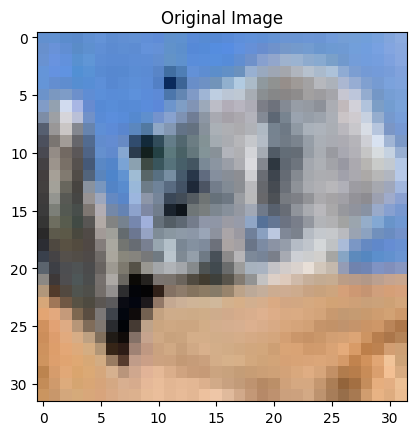

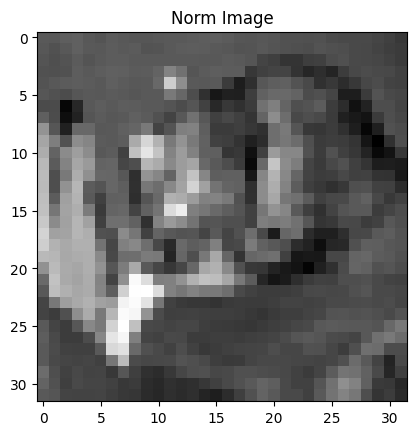

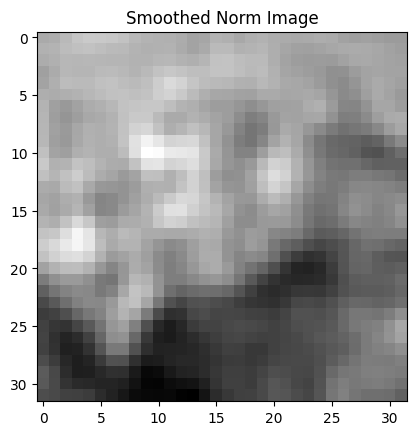

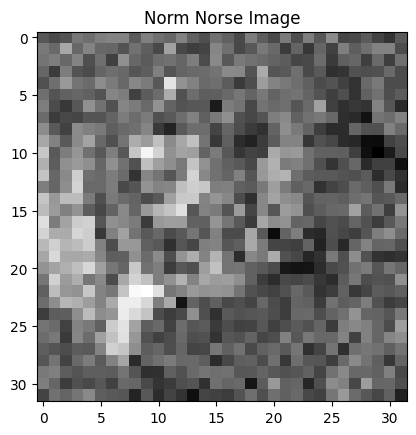

In [ ]:
#See these images in the x_test varaible
from scipy.ndimage import gaussian_filter
x_test_norm_gray_noise = x_test_norm_gray + 0.1 * np.random.normal(size=x_test_norm_gray.shape)

sigma = 1
x_test_norm_gray_noise_smoothed = gaussian_filter(x_test_norm_gray_noise, sigma=sigma)

# Plot the original, norm, smoothed and noise images for comparison
plt.figure()
plt.imshow((x_test[0] * 255).astype(np.uint8))
plt.title('Original Image')

plt.figure()
plt.imshow(x_test_norm_gray[0], cmap='gray')
plt.title('Norm Image')

plt.figure()
plt.imshow(x_test_norm_gray_noise_smoothed[0], cmap='gray')
plt.title('Smoothed Norm Image')

plt.figure()
plt.imshow(x_test_norm_gray_noise[0], cmap='gray')
plt.title('Norm Norse Image')

In [ ]:
x_test_norm_gray.shape

(10000, 32, 32, 1)

# **Model**

In [ ]:
from tensorflow.keras import layers, models

from tensorflow.keras.callbacks import EarlyStopping

def inception_block(x, filters):
    # Convolution 1x1
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    # Convolution 3x3
    conv3x3 = layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    # Convolution 5x5
    conv5x5 = layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)
    # Add maxpooling
    maxpool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool_conv1x1 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(maxpool)
    # Concatenate the convolution
    inception_block = layers.concatenate([conv1x1, conv3x3, conv5x5, maxpool_conv1x1], axis=-1)
    return inception_block

def GoogleNet(input_shape=(32, 32, 1), num_classes=10):
    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_block(x, [64, 128, 32, 32])
    x = inception_block(x, [128, 192, 96, 64])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Apply Dropout as a layer
    x = layers.Dropout(0.5)(x)

    x = layers.GlobalAveragePooling2D()(x)

    # Apply Dropout as a layer
    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x)

    # Fully Connected Layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=x)

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    return model, early_stopping

In [ ]:
model, early_stopping = GoogleNet()
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 conv2d_104 (Conv2D)         (None, 16, 16, 64)           3200      ['input_17[0][0]']            
                                                                                                  
 max_pooling2d_40 (MaxPooli  (None, 8, 8, 64)             0         ['conv2d_104[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 max_pooling2d_41 (MaxPooli  (None, 8, 8, 64)             0         ['max_pooling2d_40[0][0

In [ ]:
# Example usage of inception_block to see the summary
input_tensor = layers.Input(shape=(224, 224, 3))  # Adjust the input shape accordingly
output_tensor = inception_block(input_tensor, filters=[64, 128, 32, 32])

# Create a model using the functional API
inception_model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Display the model summary
inception_model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 max_pooling2d_44 (MaxPooli  (None, 224, 224, 3)          0         ['input_18[0][0]']            
 ng2D)                                                                                            
                                                                                                  
 conv2d_113 (Conv2D)         (None, 224, 224, 64)         256       ['input_18[0][0]']            
                                                                                                  
 conv2d_114 (Conv2D)         (None, 224, 224, 128)        3584      ['input_18[0][0]']     

In [ ]:
x_train_norm_gray.shape

(40000, 32, 32, 1)

In [ ]:
y_train.shape

(40000, 10)

In [ ]:
# RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile the model using the new optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm_gray, y_train, epochs=100, batch_size=32, validation_data=(x_val_norm_gray, y_val),callbacks=[early_stopping])


Epoch 1/100
1250/1250 [==============================] - 14s 9ms/step - loss: 1.8488 - accuracy: 0.3130 - val_loss: 1.5543 - val_accuracy: 0.4365
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5207 - accuracy: 0.4508 - val_loss: 1.3430 - val_accuracy: 0.5134
Epoch 3/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3503 - accuracy: 0.5156 - val_loss: 1.1960 - val_accuracy: 0.5821
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2359 - accuracy: 0.5588 - val_loss: 1.1409 - val_accuracy: 0.6014
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1496 - accuracy: 0.5931 - val_loss: 1.0693 - val_accuracy: 0.6256
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0875 - accuracy: 0.6144 - val_loss: 1.0691 - val_accuracy: 0.6251
Epoch 7/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0311 - accuracy: 0.6395 - val_loss: 1.0245 -

In [ ]:
#See the score in the x_test_norm_gray that is just normalize and become in grayscale
score = model.evaluate(x_test_norm_gray, y_test)
print('Test Acurracy: {}'.format(score[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.8859 - accuracy: 0.7012
Test Acurracy: 0.701200008392334


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy_norm_gray = history.history['accuracy']
loss_norm_gray = history.history['loss']

<ipython-input-341-c156c362e132>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy_norm_gray, 'bo', color = 'r', label='Training Acuracy')


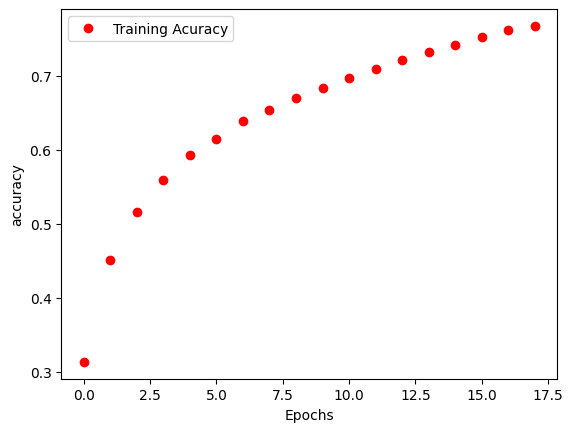

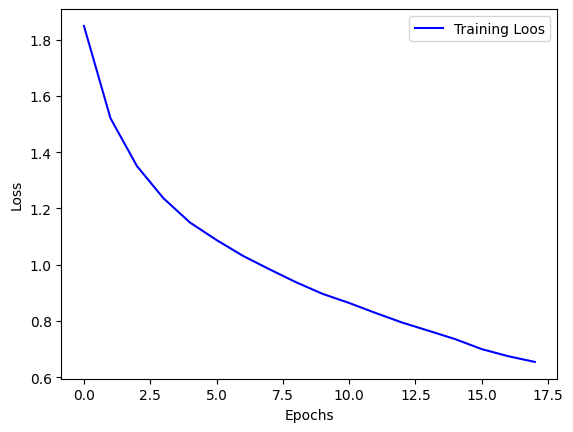

In [ ]:
#See the model the score and accuracy in a graph
epochs = range(len(accuracy_norm_gray))
plt.figure()
plt.plot(epochs, accuracy_norm_gray, 'bo', color = 'r', label='Training Acuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend();

plt.figure()
plt.plot(epochs, loss_norm_gray, 'b', label='Training Loos')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
# RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile the model using the new optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm_gray_noise, y_train, epochs=150, batch_size=50, validation_data=(x_val_norm_gray_noise, y_val),callbacks=[early_stopping])

Epoch 1/150
800/800 [==============================] - 13s 11ms/step - loss: 0.7768 - accuracy: 0.7226 - val_loss: 1.0340 - val_accuracy: 0.6523
Epoch 2/150
800/800 [==============================] - 9s 11ms/step - loss: 0.7513 - accuracy: 0.7322 - val_loss: 1.0175 - val_accuracy: 0.6627
Epoch 3/150
800/800 [==============================] - 9s 11ms/step - loss: 0.7149 - accuracy: 0.7465 - val_loss: 1.0532 - val_accuracy: 0.6554
Epoch 4/150
800/800 [==============================] - 9s 11ms/step - loss: 0.6941 - accuracy: 0.7534 - val_loss: 1.0825 - val_accuracy: 0.6434
Epoch 5/150
800/800 [==============================] - 9s 11ms/step - loss: 0.6678 - accuracy: 0.7625 - val_loss: 1.0141 - val_accuracy: 0.6600
Epoch 6/150
800/800 [==============================] - 9s 11ms/step - loss: 0.6440 - accuracy: 0.7702 - val_loss: 1.0593 - val_accuracy: 0.6588
Epoch 7/150
800/800 [==============================] - 8s 10ms/step - loss: 0.6161 - accuracy: 0.7792 - val_loss: 1.0327 - val_accuracy

In [ ]:
#See the score in the x_test_norm_gray_noise that is just normalize, become in grayscale and reduce the noise with numpy
score = model.evaluate(x_test_norm_gray_noise, y_test)
print('Test Acurracy: {}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 1.0433 - accuracy: 0.6573
Test Acurracy: 0.6572999954223633


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy_norm_gray_noise = history.history['accuracy']
loss_norm_gray_noise = history.history['loss']

<ipython-input-354-23944907f1d2>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, accuracy_norm_gray_noise, 'b', color = 'r', label='Training Noise Random Acuracy')


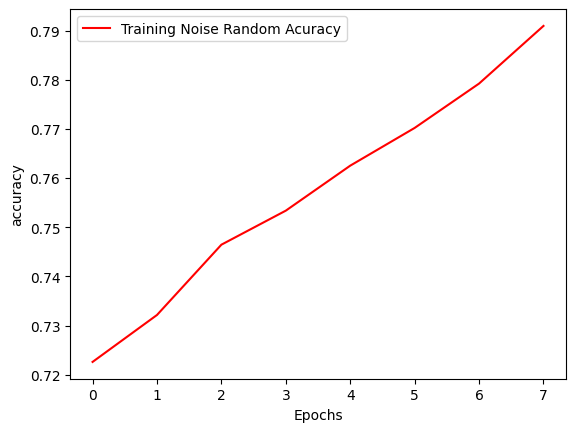

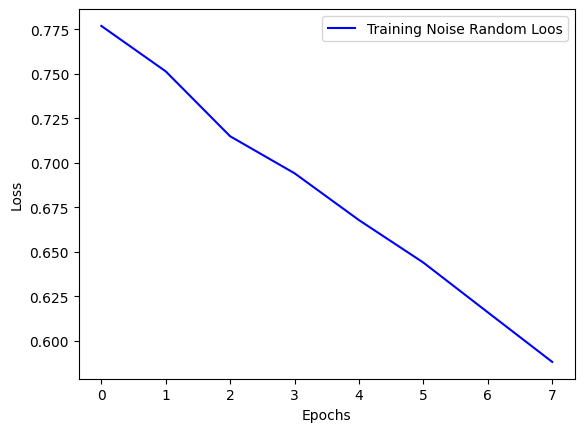

In [ ]:
#See the model with reduce noise the score and accuracy in a graph
epochs = range(len(accuracy_norm_gray_noise))
plt.figure()
plt.plot(epochs, accuracy_norm_gray_noise, 'b', color = 'r', label='Training Noise Random Acuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend();

plt.figure()
plt.plot(epochs, loss_norm_gray_noise, 'b', label='Training Noise Random Loos')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
# RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile the model using the new optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm_gray_noise_smoothed, y_train, epochs=150, batch_size=50, validation_data=(x_val_norm_gray_noise_smoothed, y_val),callbacks=[early_stopping])

Epoch 1/150
800/800 [==============================] - 12s 11ms/step - loss: 1.9209 - accuracy: 0.3223 - val_loss: 1.8329 - val_accuracy: 0.3576
Epoch 2/150
800/800 [==============================] - 9s 12ms/step - loss: 1.8305 - accuracy: 0.3558 - val_loss: 1.8244 - val_accuracy: 0.3603
Epoch 3/150
800/800 [==============================] - 9s 11ms/step - loss: 1.7911 - accuracy: 0.3693 - val_loss: 1.8083 - val_accuracy: 0.3661
Epoch 4/150
800/800 [==============================] - 9s 11ms/step - loss: 1.7617 - accuracy: 0.3818 - val_loss: 1.7944 - val_accuracy: 0.3676
Epoch 5/150
800/800 [==============================] - 9s 12ms/step - loss: 1.7378 - accuracy: 0.3900 - val_loss: 1.7995 - val_accuracy: 0.3674
Epoch 6/150
800/800 [==============================] - 9s 11ms/step - loss: 1.7107 - accuracy: 0.3998 - val_loss: 1.8036 - val_accuracy: 0.3681
Epoch 7/150
800/800 [==============================] - 8s 10ms/step - loss: 1.6936 - accuracy: 0.4080 - val_loss: 1.7658 - val_accuracy

In [ ]:
#See the score in the x_test_norm_gray_noise that is just normalize, become in grayscale and reduce the noise with gaussian_filter
score = model.evaluate(x_test_norm_gray_noise_smoothed, y_test)
print('Test Acurracy: {}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 1.7424 - accuracy: 0.3809
Test Acurracy: 0.38089999556541443


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy_norm_gray_noise_smoothed = history.history['accuracy']
loss_norm_gray_noise_smoothed = history.history['loss']

<ipython-input-360-424088b592ac>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, accuracy_norm_gray_noise_smoothed, 'b', color = 'r', label='Training Noise Smoothad Acuracy')


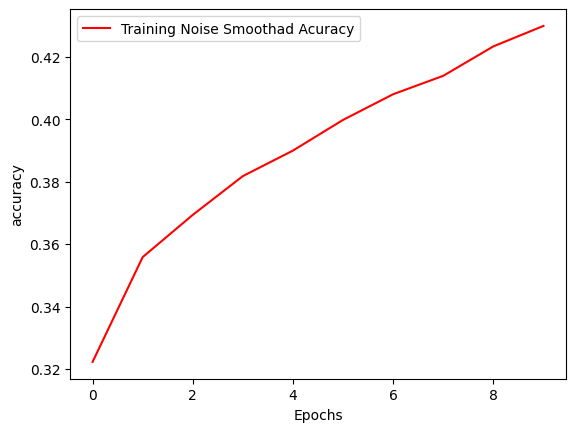

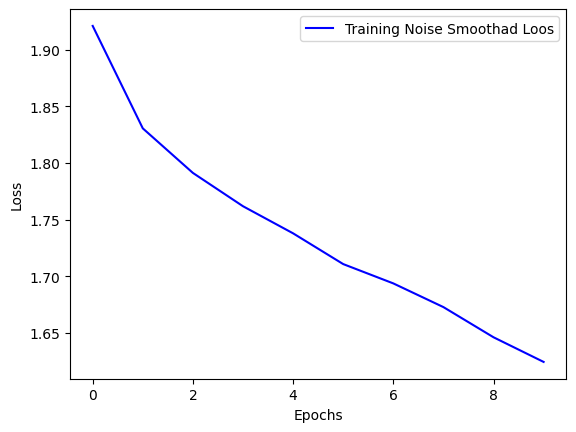

In [ ]:
#See the model with reduce noise with gaussian_filte the score and accuracy in a graph
epochs = range(len(accuracy_norm_gray_noise_smoothed))
plt.figure()
plt.plot(epochs, accuracy_norm_gray_noise_smoothed, 'b', color = 'r', label='Training Noise Smoothad Acuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend();

plt.figure()
plt.plot(epochs, loss_norm_gray_noise_smoothed, 'b', label='Training Noise Smoothad Loos')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

<Figure size 640x480 with 0 Axes>

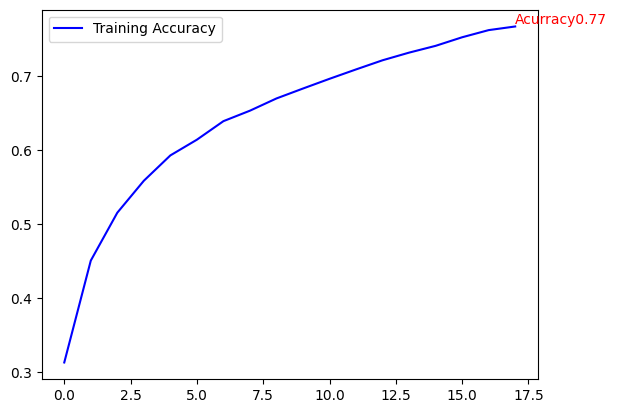

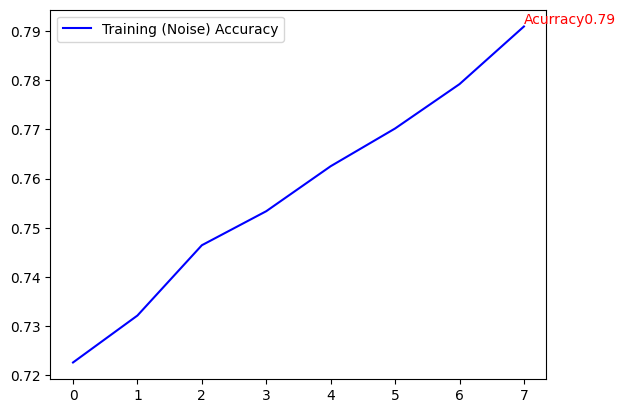

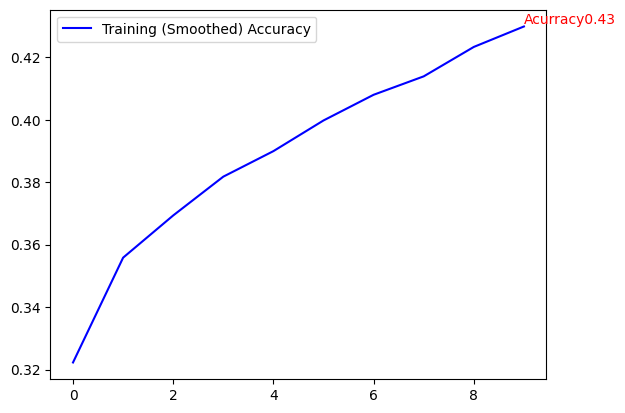

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(accuracy_norm_gray))
plt.plot(epochs, accuracy_norm_gray, 'b', label='Training Accuracy')
plt.text(epochs[-1], accuracy_norm_gray[-1], f'Acurracy{accuracy_norm_gray[-1]:.2f}', color='r', fontsize=10, ha='left', va='bottom')
plt.legend()
plt.figure()

epochs = range(len(accuracy_norm_gray_noise))
plt.plot(epochs, accuracy_norm_gray_noise, 'b', label='Training (Noise) Accuracy')
plt.text(epochs[-1], accuracy_norm_gray_noise[-1], f'Acurracy{accuracy_norm_gray_noise[-1]:.2f}', color='r', fontsize=10, ha='left', va='bottom')
plt.legend()
plt.figure()

epochs = range(len(accuracy_norm_gray_noise_smoothed))
plt.plot(epochs, accuracy_norm_gray_noise_smoothed, 'b', label='Training (Smoothed) Accuracy')
plt.text(epochs[-1], accuracy_norm_gray_noise_smoothed[-1], f'Acurracy{accuracy_norm_gray_noise_smoothed[-1]:.2f}', color='r', fontsize=10, ha='left', va='bottom')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

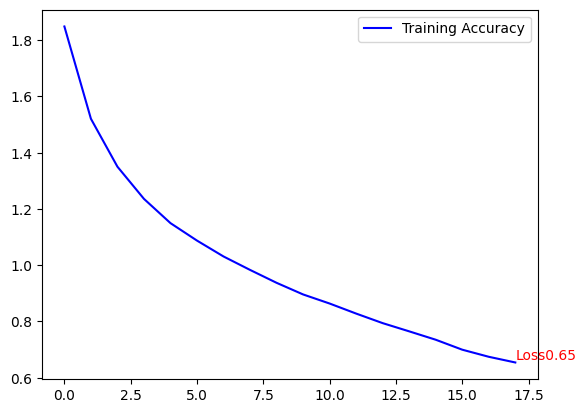

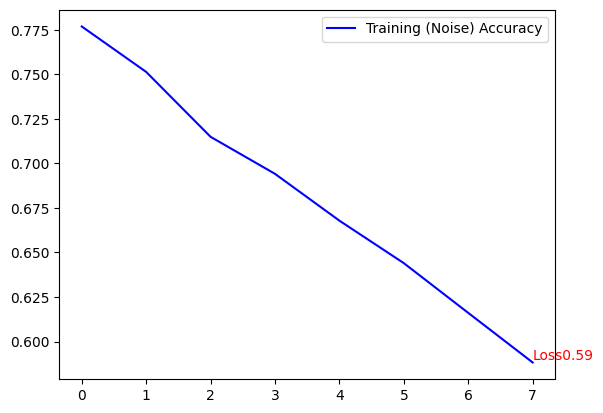

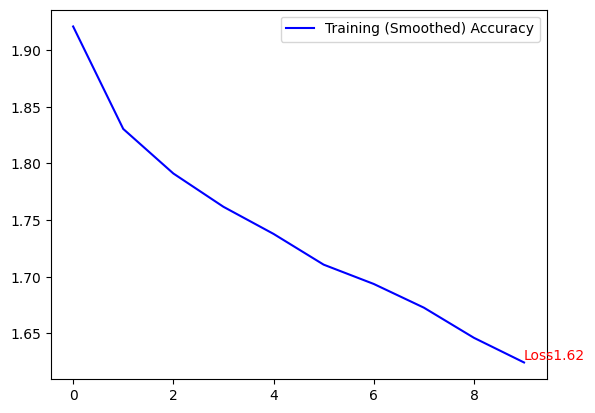

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(loss_norm_gray))
plt.plot(epochs, loss_norm_gray, 'b', label='Training Accuracy')
plt.text(epochs[-1], loss_norm_gray[-1], f'Loss{loss_norm_gray[-1]:.2f}', color='r', fontsize=10, ha='left', va='bottom')
plt.legend()
plt.figure()

epochs = range(len(loss_norm_gray_noise))
plt.plot(epochs, loss_norm_gray_noise, 'b', label='Training (Noise) Accuracy')
plt.text(epochs[-1], loss_norm_gray_noise[-1], f'Loss{loss_norm_gray_noise[-1]:.2f}', color='r', fontsize=10, ha='left', va='bottom')
plt.legend()
plt.figure()

epochs = range(len(loss_norm_gray_noise_smoothed))
plt.plot(epochs, loss_norm_gray_noise_smoothed, 'b', label='Training (Smoothed) Accuracy')
plt.text(epochs[-1], loss_norm_gray_noise_smoothed[-1], f'Loss{loss_norm_gray_noise_smoothed[-1]:.2f}', color='r', fontsize=10, ha='left', va='bottom')
plt.legend()
plt.figure()

In [ ]:
pred_norm_gray = model.predict(x_test_norm_gray)
pred_norm_gray_noise = model.predict(x_test_norm_gray_noise)
pred_norm_gray_smoothed = model.predict(x_test_norm_gray_noise_smoothed)

313/313 [==============================] - 1s 3ms/step


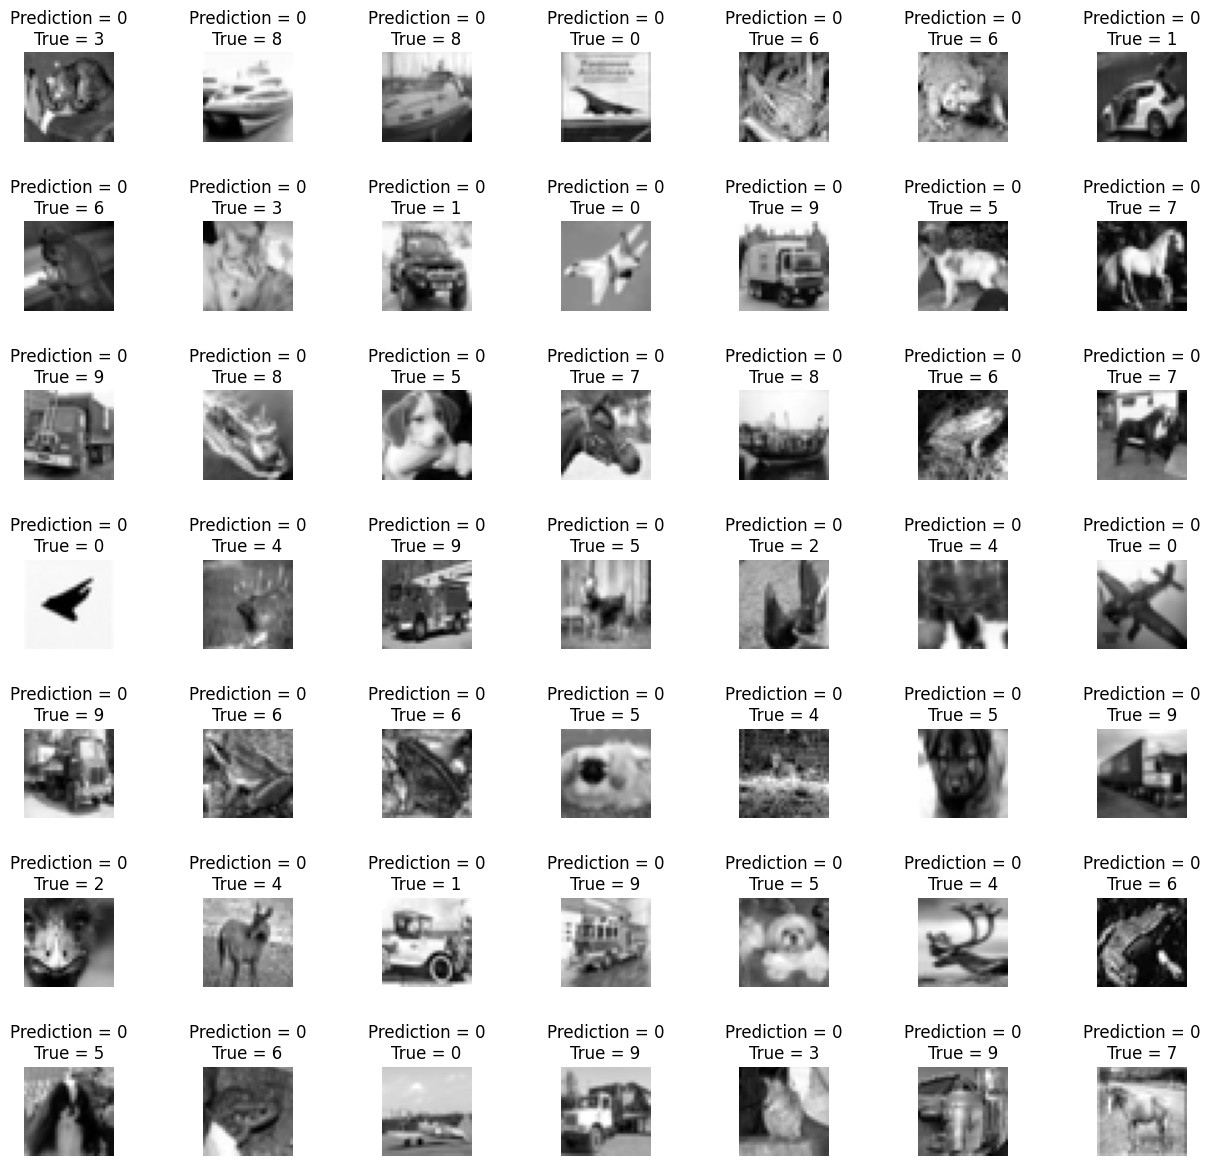

In [ ]:
#See a graph with predict values and real values in the noise dataset
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(15, 15))
axes = axes.ravel()

for i in range(L * W):
    prediction = int(pred_norm_gray[i][0])
    true_label_index = np.argmax(y_test[i])  # Get the index of the class with value 1

    axes[i].imshow(x_test_norm_gray[i], cmap='gray')
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(prediction, true_label_index))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()


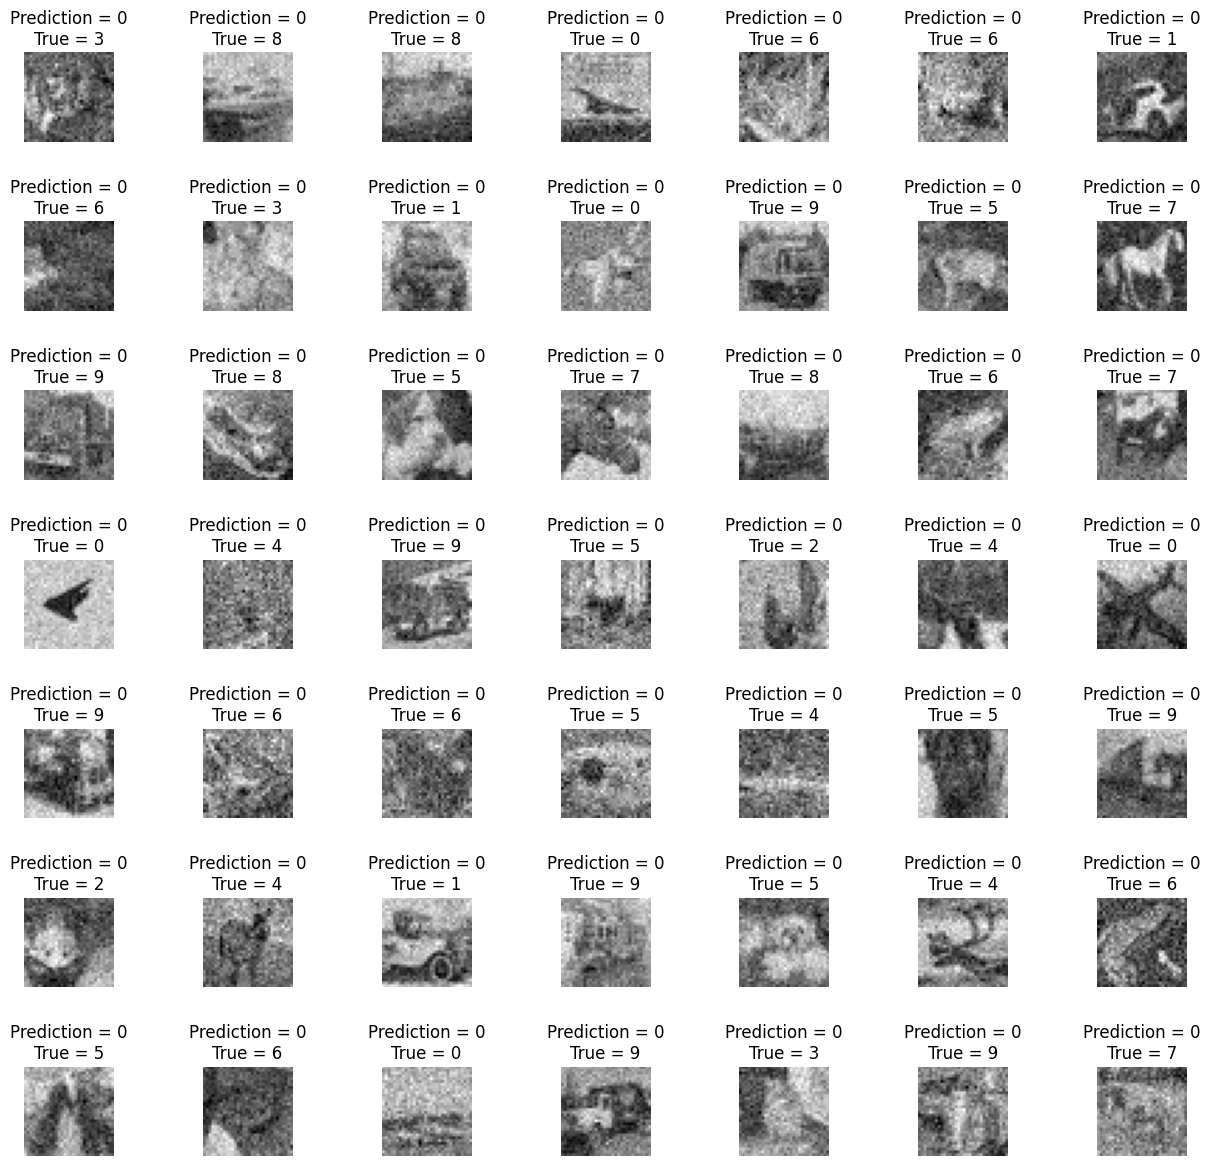

In [ ]:
#See a graph with predict values and real values in the noise dataset
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(15, 15))
axes = axes.ravel()

for i in range(L * W):
    prediction = int(pred_norm_gray_noise[i][0])
    true_label_index = np.argmax(y_test[i])  # Get the index of the class with value 1

    axes[i].imshow(x_test_norm_gray_noise[i], cmap='gray')
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(prediction, true_label_index))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

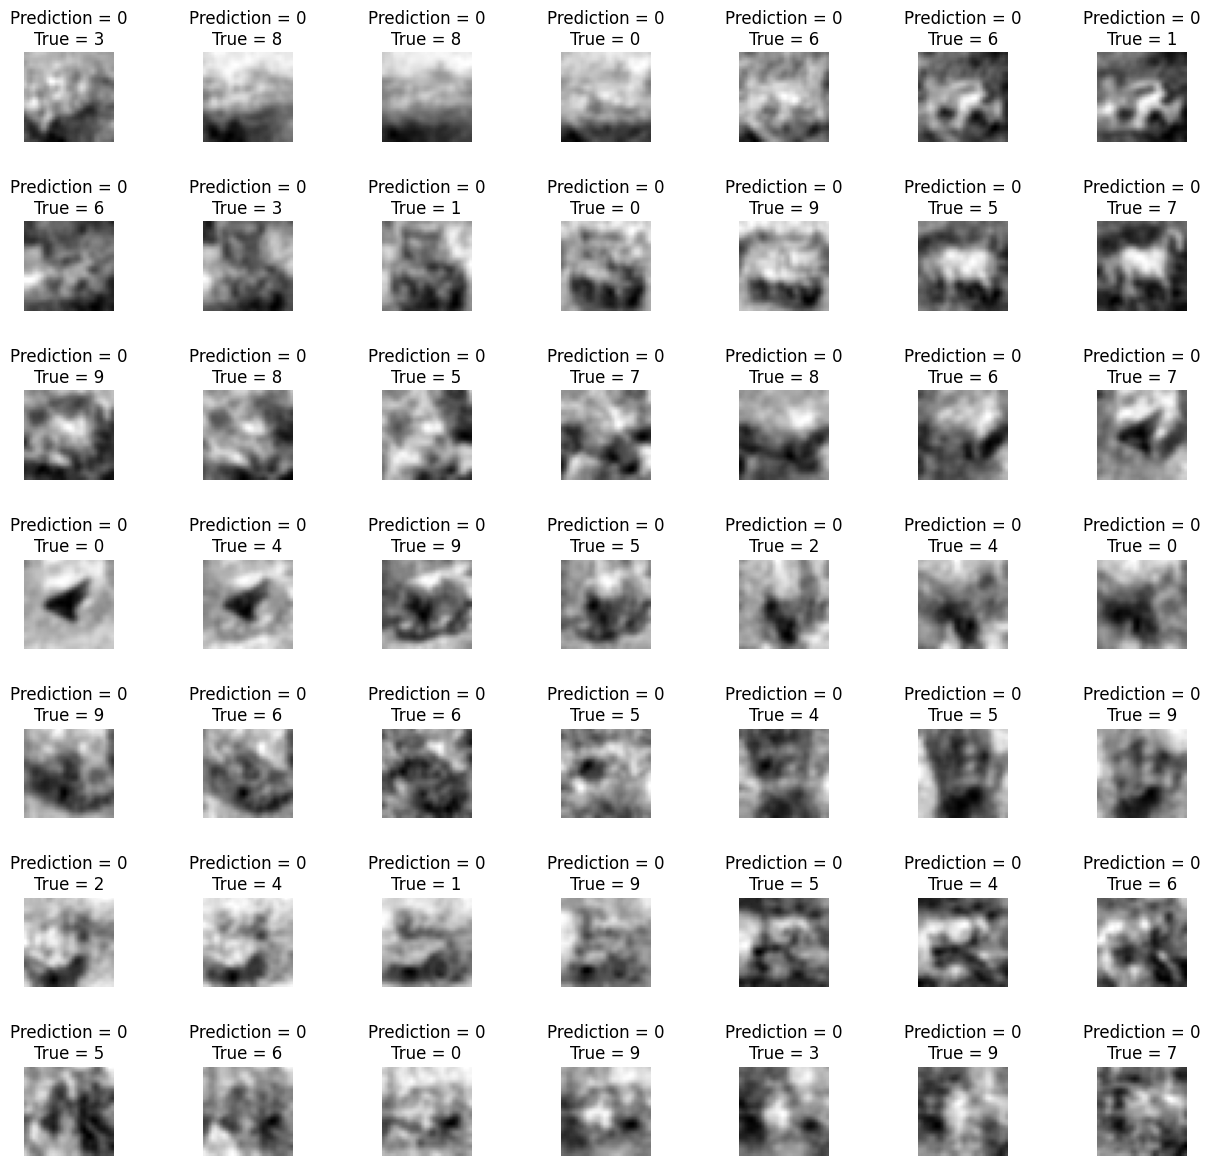

In [ ]:
#See a graph with predict values and real values in the noise dataset
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(15, 15))
axes = axes.ravel()

for i in range(L * W):
    prediction = int(pred_norm_gray_smoothed[i][0])
    true_label_index = np.argmax(y_test[i])  # Get the index of the class with value 1

    axes[i].imshow(x_test_norm_gray_noise_smoothed[i], cmap='gray')
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(prediction, true_label_index))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()